# Decision Tree Assignment 
Decision Tree
Assignment
About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
###---EDA----
df.shape

(400, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [6]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
list(df)

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

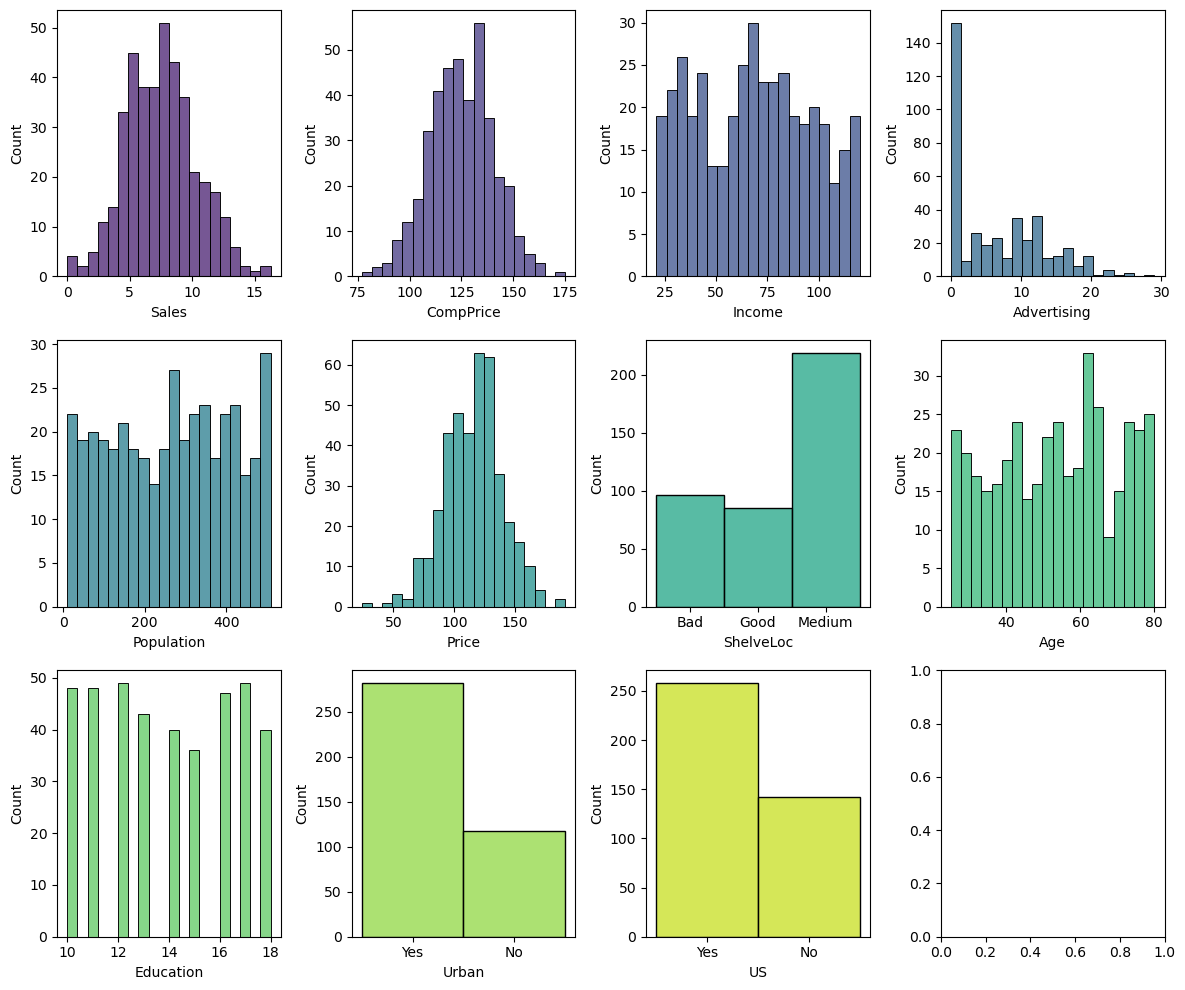

In [8]:
##--Histogram---##
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12,10))
h1 = ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 
      'Price', 'ShelveLoc', 'Age', 'Education', 'Urban','US']
colors = sns.color_palette('viridis', n_colors=len(h1))
for i, (variable, color) in enumerate(zip(h1, colors)):
    sns.histplot(data=df, x=variable, ax=axes[i // 4, i % 4], color=color, bins=20)
plt.tight_layout()
plt.show()

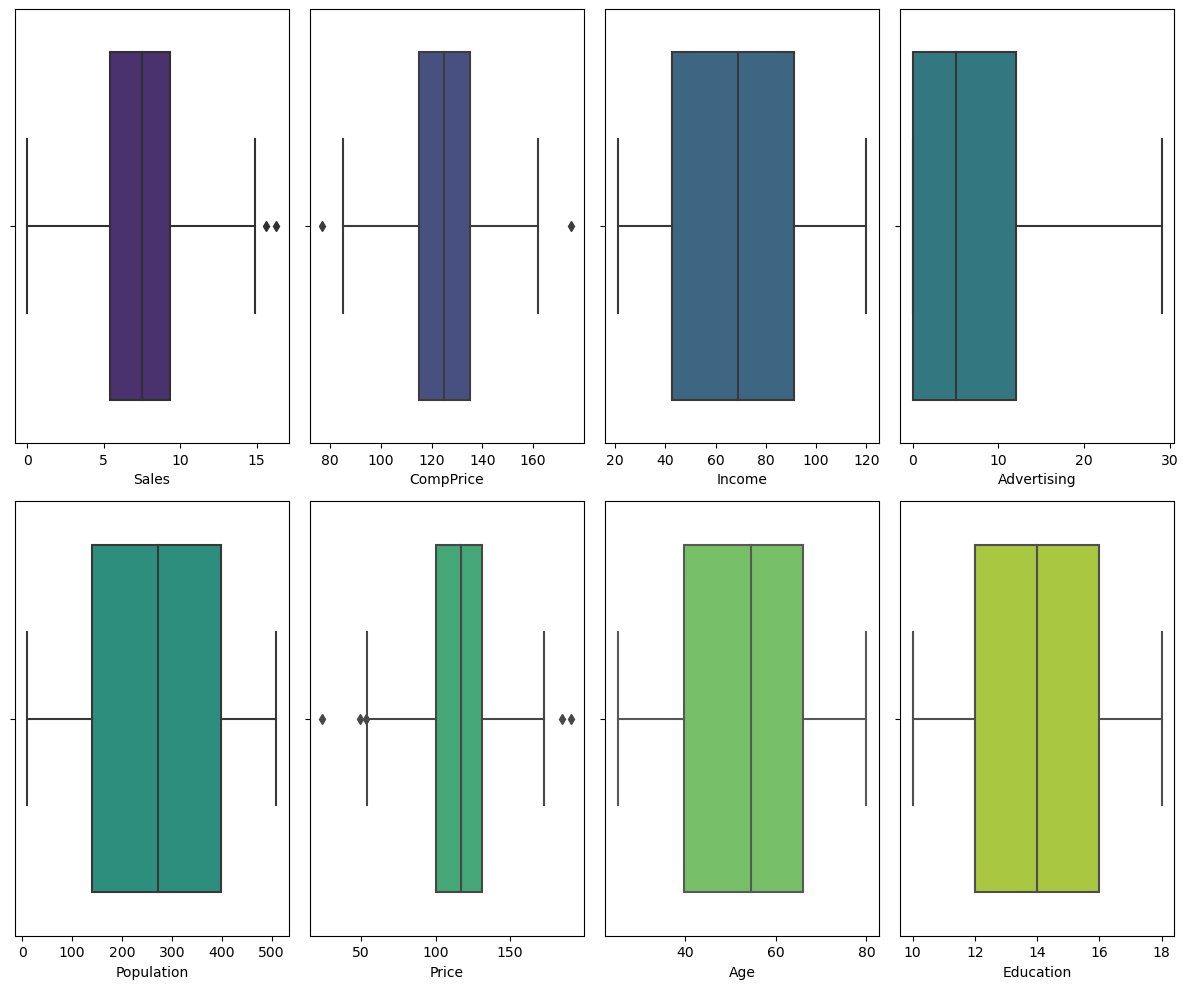

In [9]:
##--Boxplot---
numerical_columns = ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 10))
colors = sns.color_palette('viridis', n_colors=len(numerical_columns))
for i, (variable, color) in enumerate(zip(numerical_columns, colors)):
    sns.boxplot(data=df, x=variable, ax=axes[i // 4, i % 4], color=color)
plt.tight_layout()
plt.show()

Outliers for Sales: 316    15.63
376    16.27
Name: Sales, dtype: float64
Outliers for CompPrice: 42      77
310    175
Name: CompPrice, dtype: int64
Outliers for Income: Series([], Name: Income, dtype: int64)
Outliers for Advertising: Series([], Name: Advertising, dtype: int64)
Outliers for Population: Series([], Name: Population, dtype: int64)
Outliers for Price: 42      24
125     49
165    191
174    185
367     53
Name: Price, dtype: int64
Outliers for Age: Series([], Name: Age, dtype: int64)
Outliers for Education: Series([], Name: Education, dtype: int64)


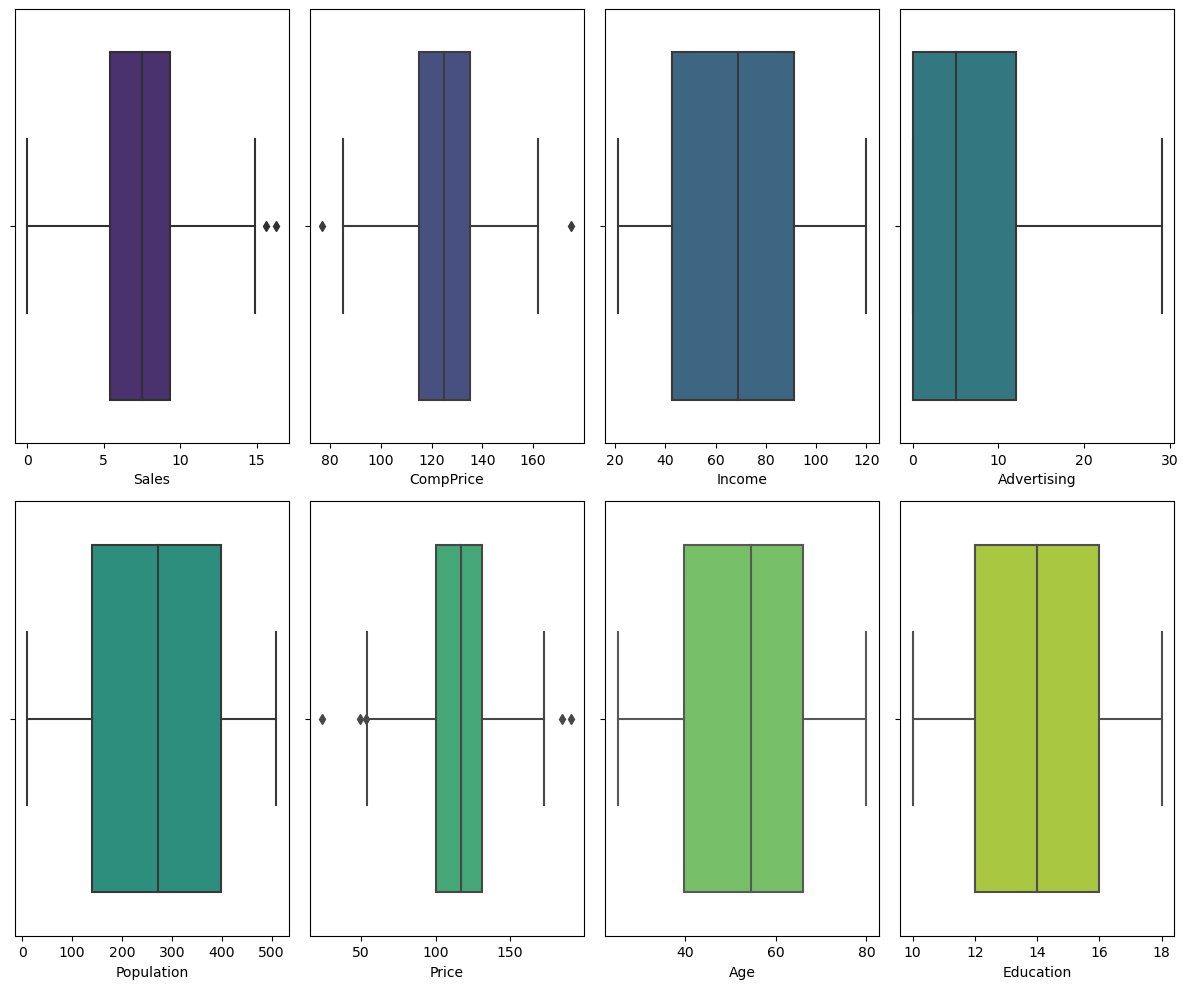

In [10]:
###---Out-liers---##
numerical_columns = ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 10))
colors = sns.color_palette('viridis', n_colors=len(numerical_columns))
for i, (variable, color) in enumerate(zip(numerical_columns, colors)):
    sns.boxplot(data=df, x=variable, ax=axes[i // 4, i % 4], color=color)
    # Calculate outliers using IQR
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[variable] < (Q1 - 1.5 * IQR)) | (df[variable] > (Q3 + 1.5 * IQR))][variable]
    print(f"Outliers for {variable}: {outliers}")
plt.tight_layout()
plt.show()

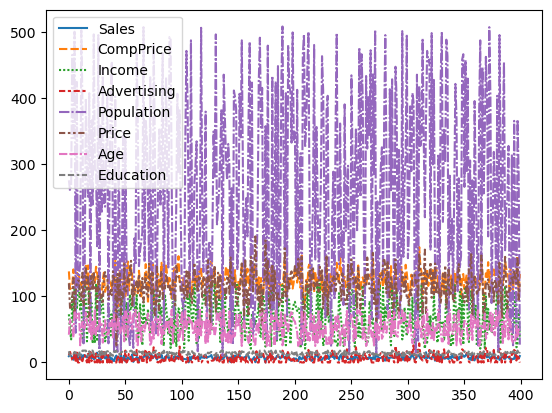

In [11]:
###---Line-plot---
sns.lineplot(data=df[h1])
plt.show()

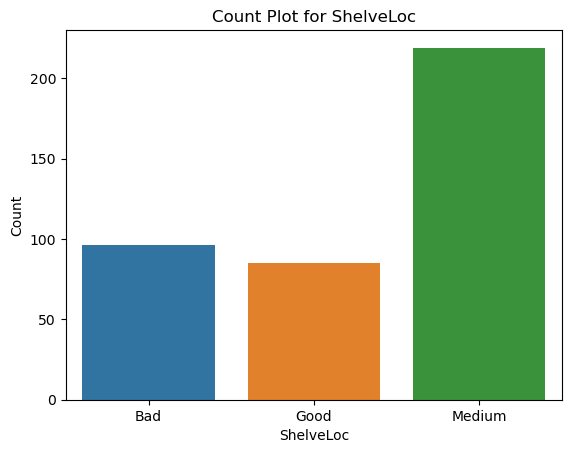

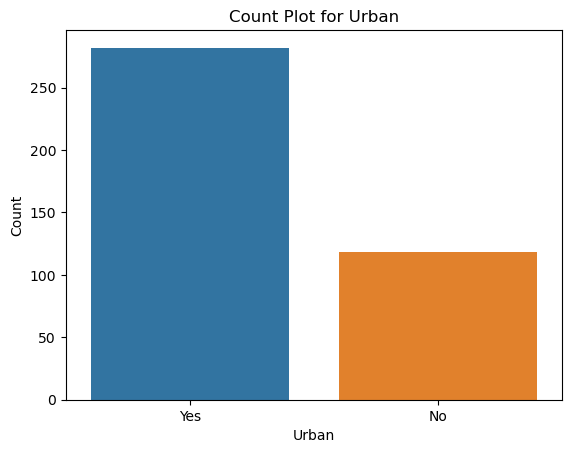

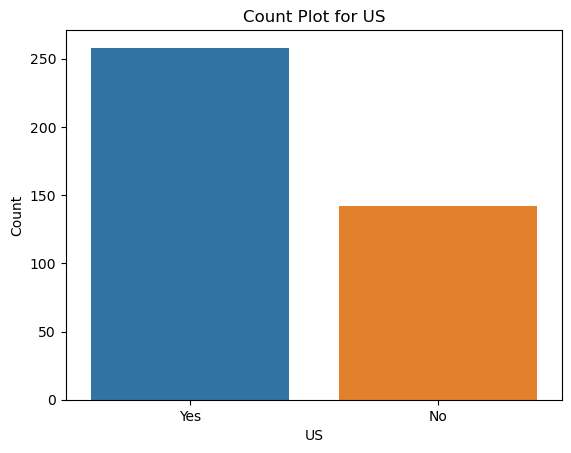

In [12]:
###--count-plot --
df = pd.DataFrame(df)
for variable in ['ShelveLoc', 'Urban', 'US']:
    plt.figure()
    sns.countplot(x=variable, data=df)
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.title(f'Count Plot for {variable}')
    plt.show()

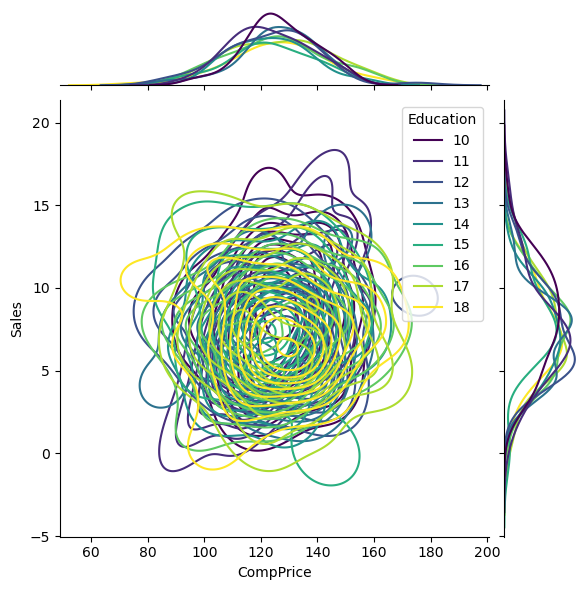

In [13]:
####---Joint-plot----
subset_df = df[h1]
sns.jointplot(x='CompPrice', y='Sales', data=subset_df, kind='kde', hue='Education', palette='viridis')
plt.show()

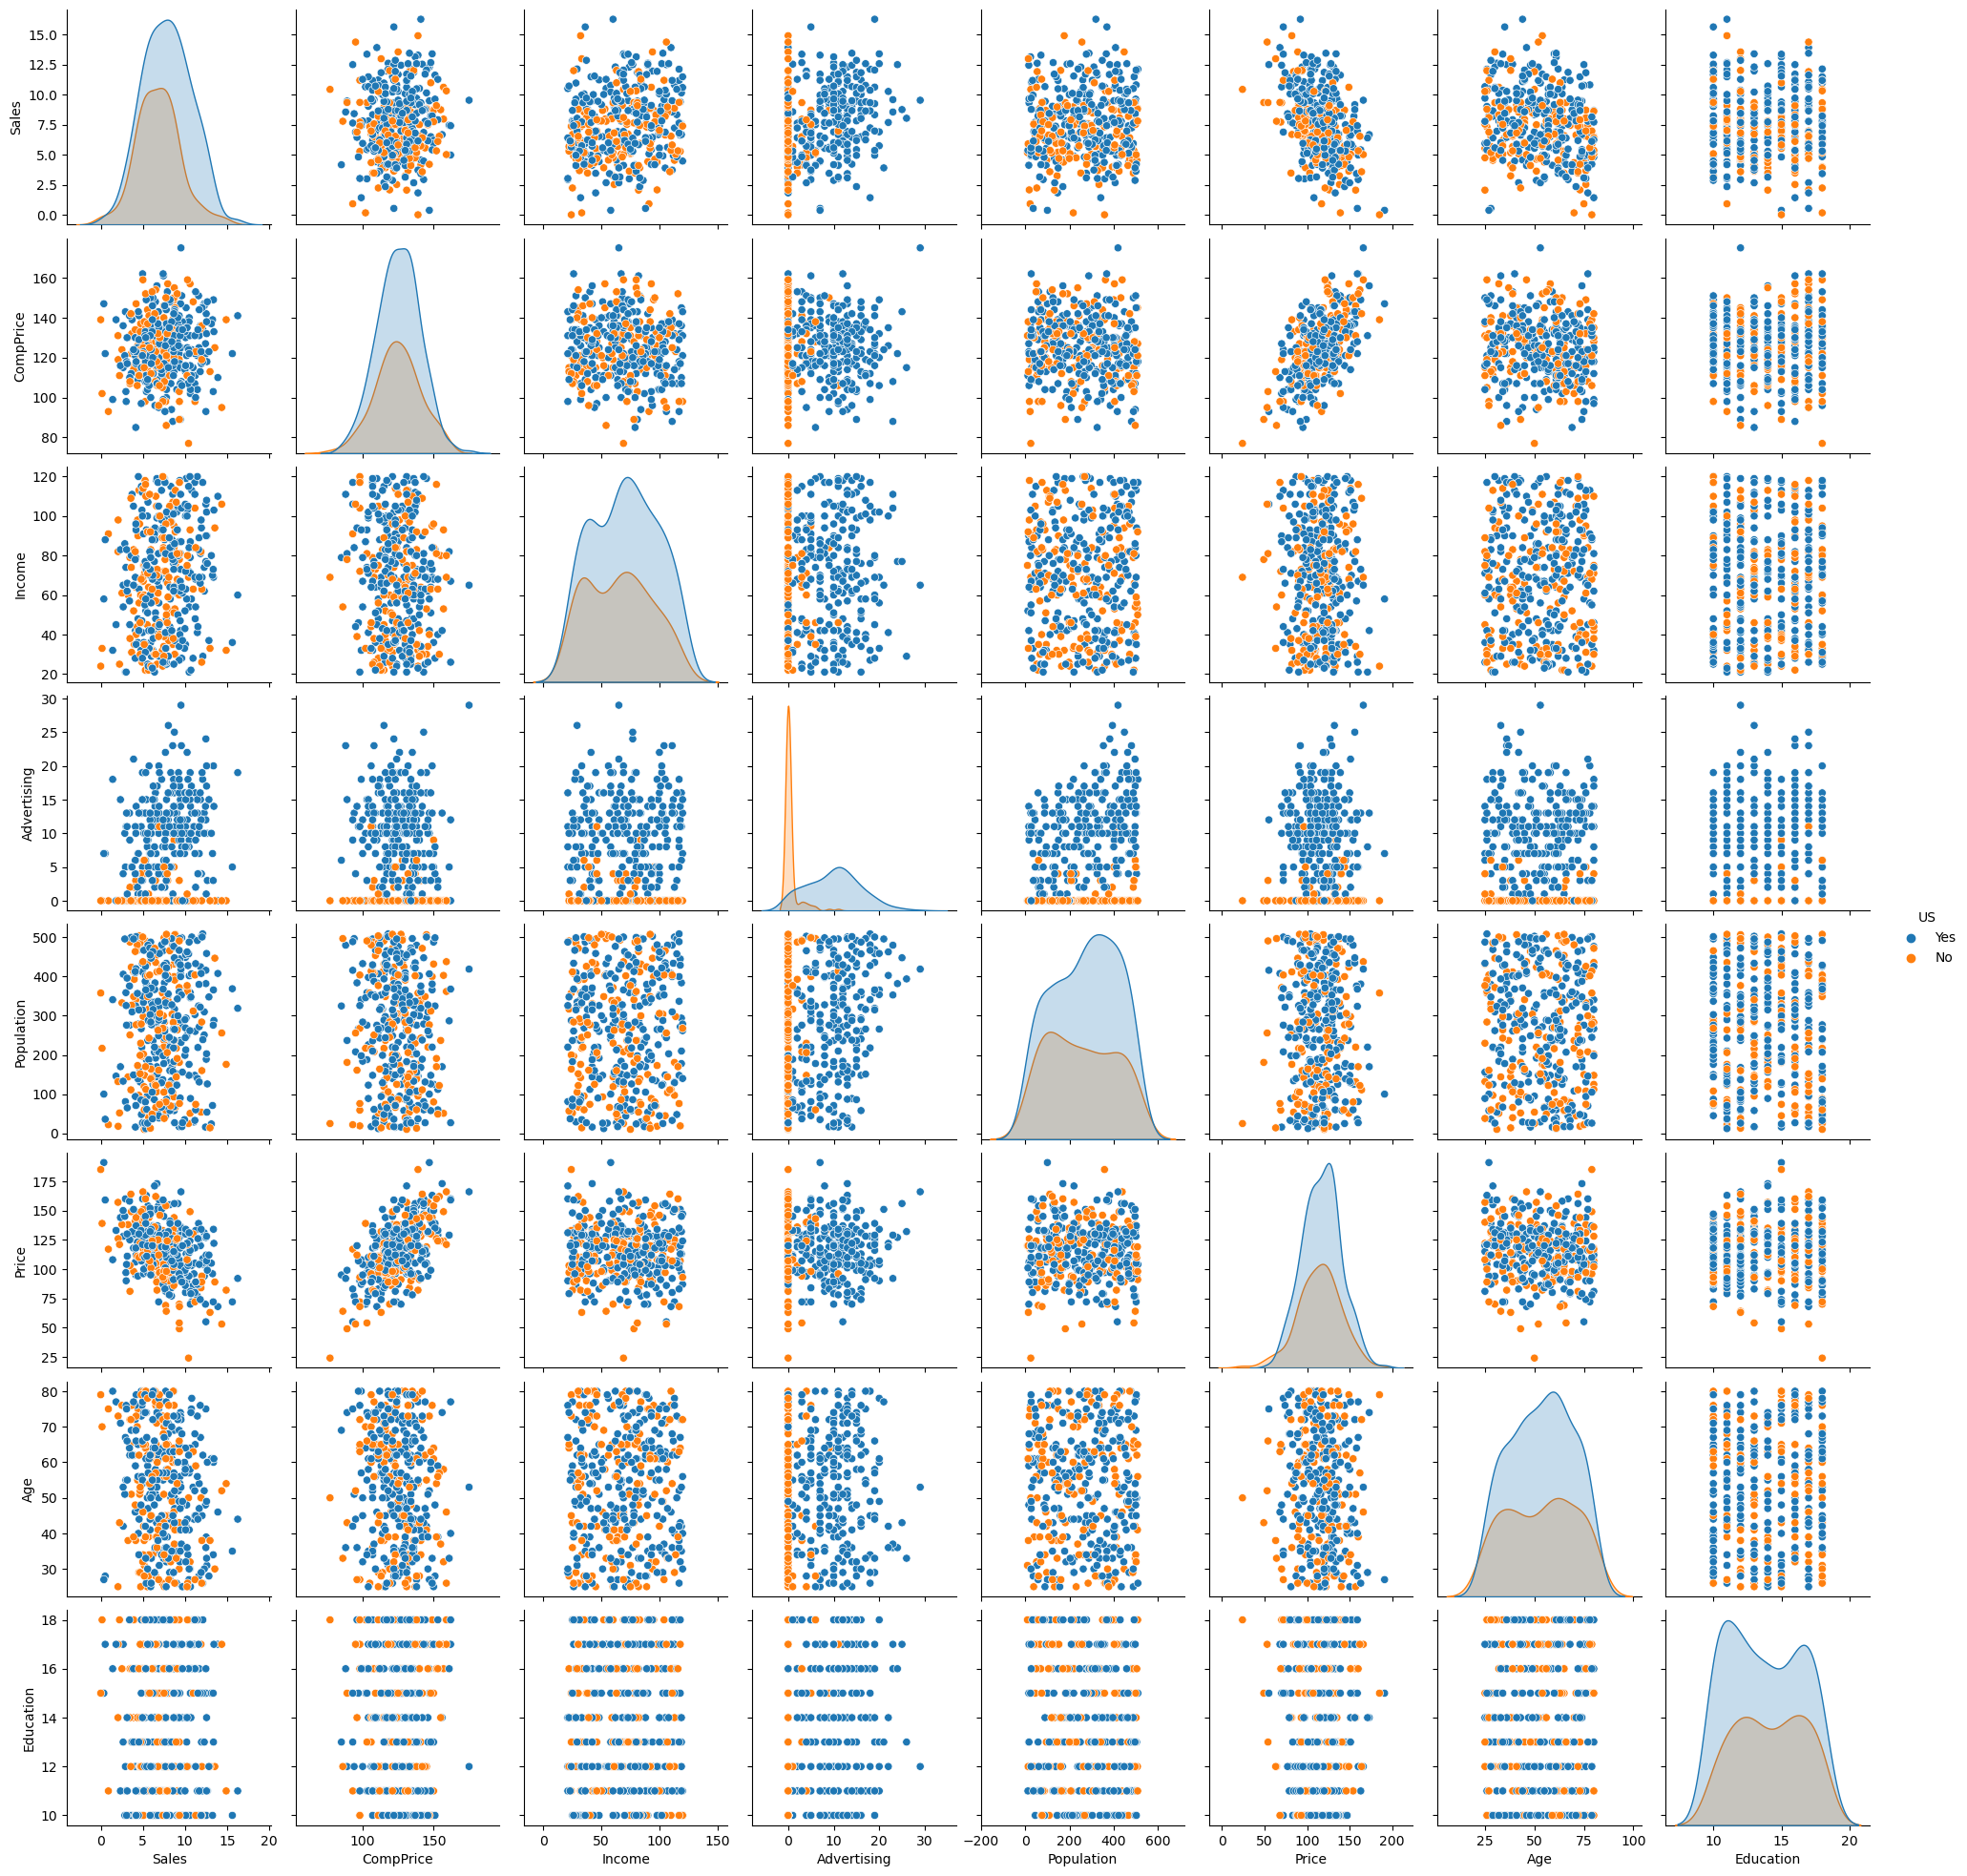

In [14]:
###----pair-plot---
sns.pairplot(df,hue='US')
plt.show()

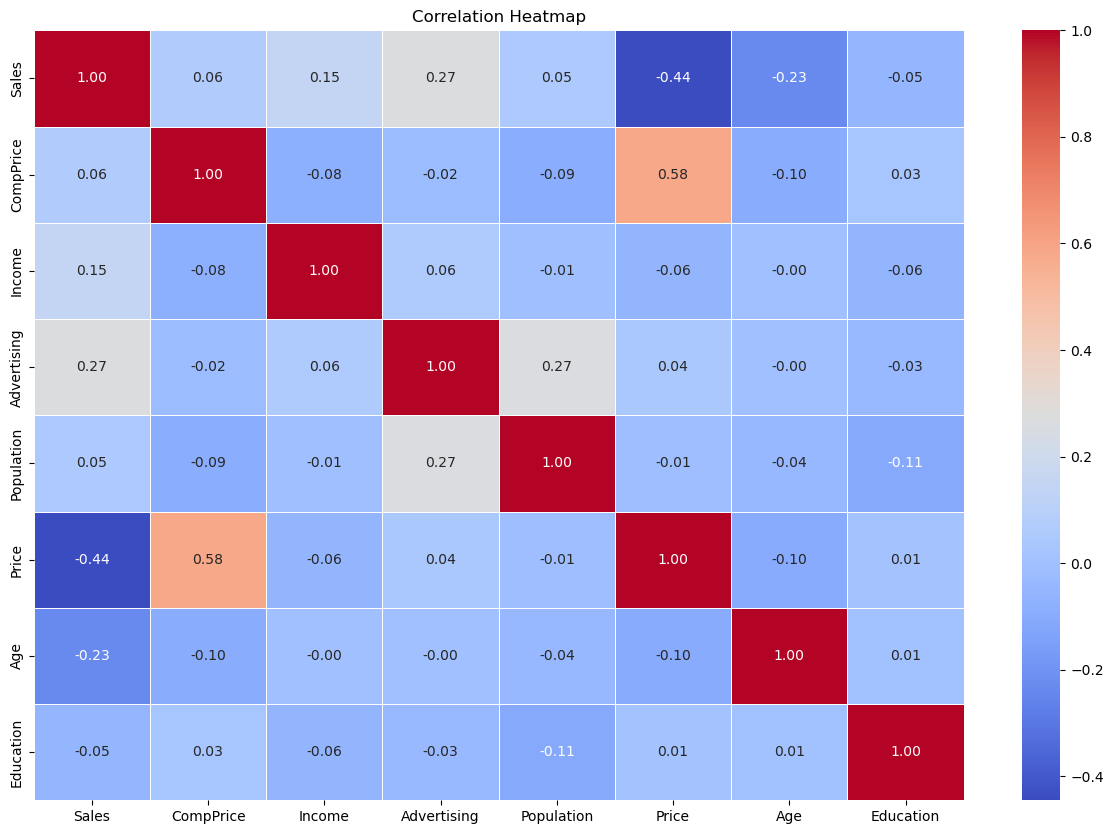

In [15]:
###--Heat-map----
subset_df = df[h1]
correlation_matrix = subset_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

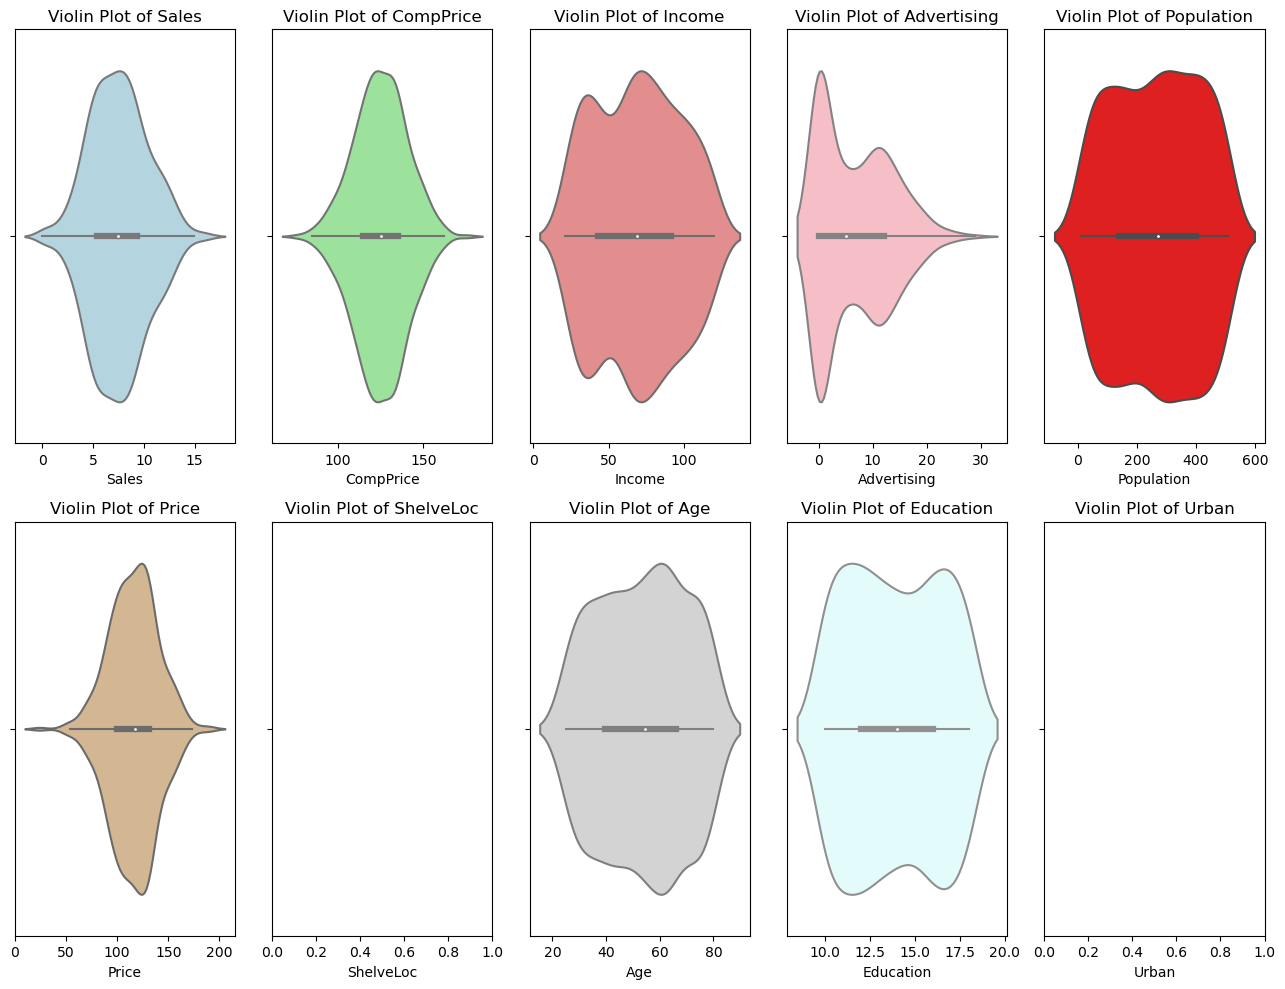

In [16]:
###---Violin-plot ----
violinplots = ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 
      'Price', 'ShelveLoc', 'Age', 'Education', 'Urban','US']
for column in violinplots:
    df[column] = pd.to_numeric(df[column], errors='coerce')
violin_colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'red', 'burlywood', 'lightyellow', 'lightgray', 'lightcyan','orange']
plt.figure(figsize=(13,10))
for i, (violin_column, violin_color) in enumerate(zip(violinplots, violin_colors), 1):
    plt.subplot(2, 5, i)  # Start the index from 1
    sns.violinplot(x=df[violin_column], color=violin_color)
    plt.title(f'Violin Plot of {violin_column}')
plt.tight_layout()
plt.show()

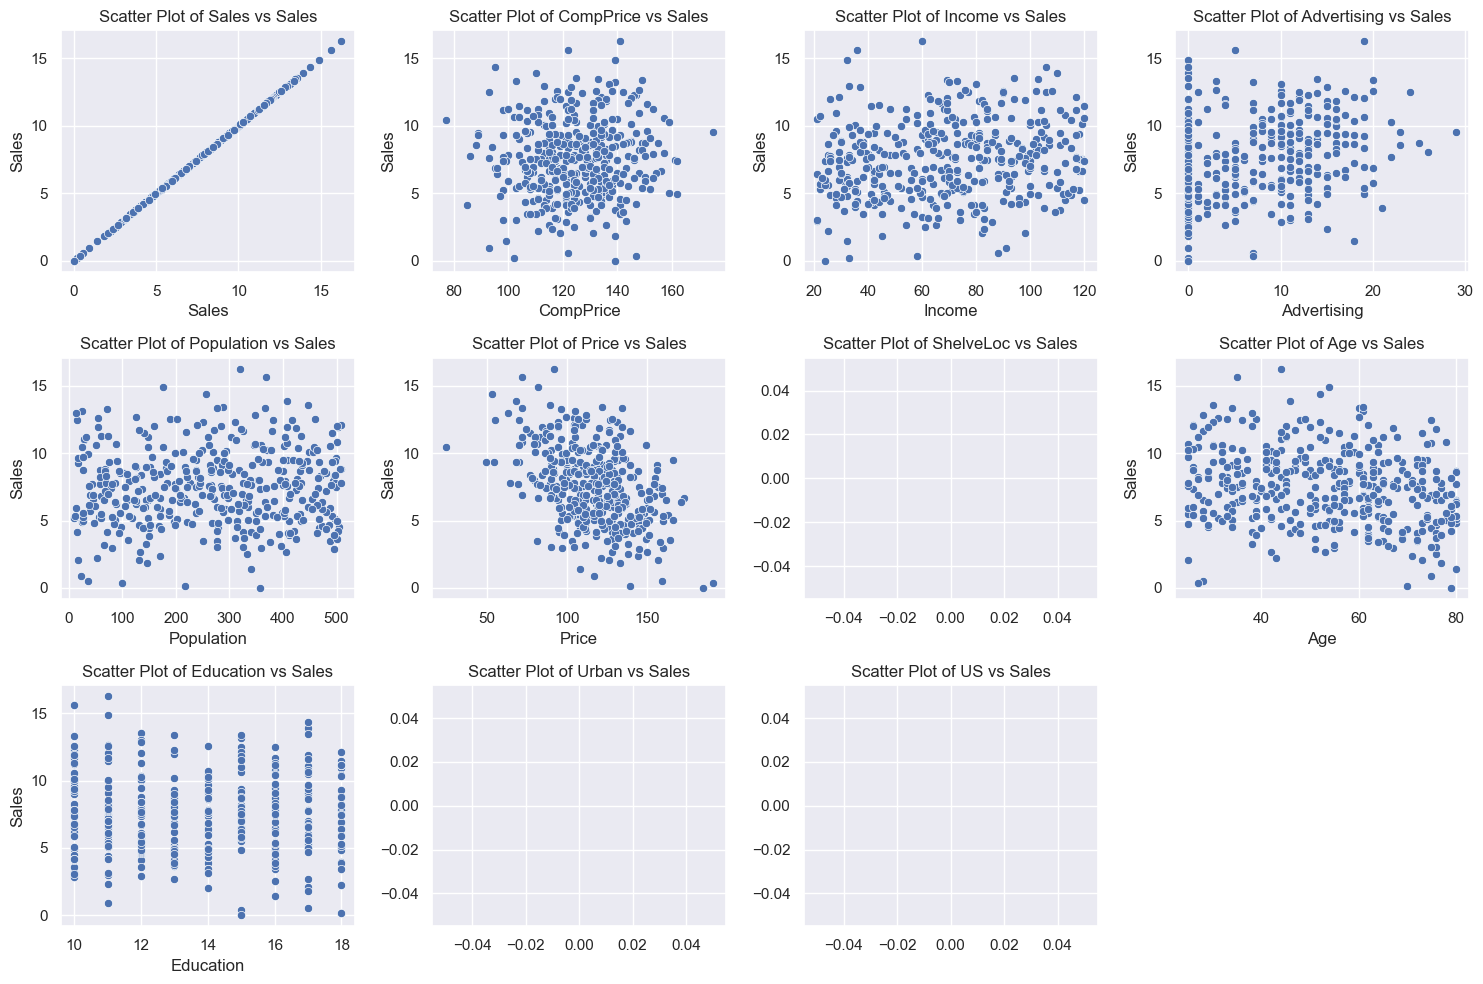

In [17]:
####---Scatter-plot--
sns.set(style="darkgrid")
plt.figure(figsize=(15, 10))
for i, column in enumerate(h1, 1):
    plt.subplot(3, 4, i)  
    sns.scatterplot(x=df[column], y='Sales',data=df)  
    plt.title(f'Scatter Plot of {column} vs Sales')
plt.tight_layout()
plt.show()

In [18]:
###---label encoding
Le=LabelEncoder()
df['ShelveLoc']=Le.fit_transform(df['ShelveLoc'])
df['US']=Le.fit_transform(df['US'])
df['Urban']=Le.fit_transform(df['Urban'])
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,0,0
1,11.22,111,48,16,260,83,0,65,10,0,0
2,10.06,113,35,10,269,80,0,59,12,0,0
3,7.40,117,100,4,466,97,0,55,14,0,0
4,4.15,141,64,3,340,128,0,38,13,0,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,0,33,14,0,0
396,6.14,139,23,3,37,120,0,55,11,0,0
397,7.41,162,26,12,368,159,0,40,18,0,0
398,5.94,100,79,7,284,95,0,50,12,0,0


In [19]:
###---X-&-Y--
y=df['Sales']
x=df.iloc[:,1:11]

In [20]:
print(y)

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64


In [21]:
print(x)

     CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120          0   42   
1          111      48           16         260     83          0   65   
2          113      35           10         269     80          0   59   
3          117     100            4         466     97          0   55   
4          141      64            3         340    128          0   38   
..         ...     ...          ...         ...    ...        ...  ...   
395        138     108           17         203    128          0   33   
396        139      23            3          37    120          0   55   
397        162      26           12         368    159          0   40   
398        100      79            7         284     95          0   50   
399        134      37            0          27    120          0   49   

     Education  Urban  US  
0           17      0   0  
1           10      0   0  
2           12      0   0  

In [22]:
###---Decision tree regressor---MAx-depth=3-
DT = DecisionTreeRegressor(random_state=0,max_depth=3)

In [23]:
###---Cross-Validation--
training_error = []
test_error = []

for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    DT.fit(X_train,Y_train)
    Y_pred_train = DT.predict(X_train)
    Y_pred_test  = DT.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train ,Y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_test ,Y_pred_test)))

In [24]:
print("Average training Error:",np.mean(training_error).round(3))
print("Average test Error:",np.mean(test_error).round(3))
print("Decision Tree - variance:",np.mean(test_error).round(3)-np.mean(training_error).round(3))

Average training Error: 2.219
Average test Error: 2.592
Decision Tree - variance: 0.3730000000000002


In [25]:
###--- Max-depth =5 
DT = DecisionTreeRegressor(random_state=0,max_depth=5)

In [26]:
training_error = []
test_error = []

for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    DT.fit(X_train,Y_train)
    Y_pred_train = DT.predict(X_train)
    Y_pred_test  = DT.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train ,Y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_test ,Y_pred_test)))

In [27]:
print("Average training Error:",np.mean(training_error).round(3))
print("Average test Error:",np.mean(test_error).round(3))
print("Decision Tree - variance:",np.mean(test_error).round(3)-np.mean(training_error).round(3))

Average training Error: 1.731
Average test Error: 2.654
Decision Tree - variance: 0.9229999999999998


In [28]:
###----Bagging-regressor--n-estimators=10-
bag = BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                        n_estimators=10,
                        max_samples=0.6,
                        max_features=0.7)


In [29]:
training_error = []
test_error = []

for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    bag.fit(X_train,Y_train)
    Y_pred_train = bag.predict(X_train)
    Y_pred_test  = bag.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train ,Y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_test ,Y_pred_test)))

In [30]:
print("Average training Error:",np.mean(training_error).round(3))
print("Average test Error:",np.mean(test_error).round(3))
print("Bagging-variance:",np.mean(test_error).round(3)-np.mean(training_error).round(3))

Average training Error: 1.448
Average test Error: 2.424
Bagging-variance: 0.976


In [31]:
#####----N-estimators = 100,max_samples=0.8,max_features=0.9

bag = BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                        n_estimators=100,
                        max_samples=0.8,
                        max_features=0.9)

In [32]:
training_error = []
test_error = []

for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    bag.fit(X_train,Y_train)
    Y_pred_train = bag.predict(X_train)
    Y_pred_test  = bag.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train ,Y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_test ,Y_pred_test)))

In [33]:
print("Average training Error:",np.mean(training_error).round(3))
print("Average test Error:",np.mean(test_error).round(3))
print("Bagging-variance:",np.mean(test_error).round(3)-np.mean(training_error).round(3))

Average training Error: 1.01
Average test Error: 2.204
Bagging-variance: 1.1940000000000002


In [34]:
###depth of the nodes 
print("Number of Nodes",DT.tree_.node_count)
print("Level of Depth",DT.tree_.max_depth)

Number of Nodes 51
Level of Depth 5
